In [41]:
pip install openpyxl



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
#cargar los datos
import pandas as pd
df = pd.read_excel('data/requests.xlsx')
pd.set_option('display.max_columns', None)

In [2]:
df.sample(5)

,Booking,Request date,Requested by,Authorized by,Department,Currency,Amount,Reason,Reason 2,Status,CustomerShortname,CustomerRegion,Amount COMGES in EUR
109631,100/1109631,2024-04-22 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,USD,3.92,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT3,Region 3,3.659618
164605,100/1164605,2024-05-30 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,USD,1.24,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT1,Region 1,1.157634
213557,100/1213557,2024-07-08 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,USD,2.84,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT1,Region 1,2.651356
128009,100/1128009,2024-05-08 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,USD,3.00,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT2,Region 2,2.800728
199198,100/1199198,2024-07-05 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,USD,1.47,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT1,Region 1,1.372357


In [44]:
#miramos los tipos de datos por columnas y los nulos.
#Nos llama la atención Request date en tipo object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239400 entries, 0 to 239399
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Booking               239400 non-null  object 
 1   Request date          239400 non-null  object 
 2   Requested by          239400 non-null  object 
 3   Authorized by         239398 non-null  object 
 4   Department            239400 non-null  object 
 5   Currency              239400 non-null  object 
 6   Amount                239400 non-null  float64
 7   Reason                239397 non-null  object 
 8   Reason 2              239316 non-null  object 
 9   Status                239400 non-null  object 
 10  CustomerShortname     239400 non-null  object 
 11  CustomerRegion        239400 non-null  object 
 12  Amount COMGES in EUR  239392 non-null  float64
dtypes: float64(2), object(11)
memory usage: 23.7+ MB


In [45]:
df.columns

Index(['Booking', 'Request date', 'Requested by', 'Authorized by',
       'Department', 'Currency', 'Amount', 'Reason', 'Reason 2', 'Status',
       'CustomerShortname', 'CustomerRegion', 'Amount COMGES in EUR'],
      dtype='object')

In [46]:
df.isnull().sum()

Booking                  0
Request date             0
Requested by             0
Authorized by            2
Department               0
Currency                 0
Amount                   0
Reason                   3
Reason 2                84
Status                   0
CustomerShortname        0
CustomerRegion           0
Amount COMGES in EUR     8
dtype: int64

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,239400.0,1408.656182,184094.647958,-219.9,1.89,2.730000,4.580000,38000000.00
Amount COMGES in EUR,239392.0,12.983835,99.618487,-219.9,1.77,2.557998,4.275778,18356.96


In [48]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Booking,239400,239393,100/1239393,3
Request date,239400,156,2024-05-30 00:00:00,44938
Requested by,239400,134,user23@hotelbeds.com,230627
Authorized by,239398,43,approver25@hotelbeds.com,230912
Department,239400,1,Sales,239400
Currency,239400,26,USD,228519
Reason,239397,7,OTHERS,234622
Reason 2,239316,39,SPECIFIC CUSTOMER AGREEMENTS,234061
Status,239400,5,Applied,221275
CustomerShortname,239400,687,CLIENT1,84466


In [49]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

Booking: ['100/1000000' '100/1000001' '100/1000002' ... '100/1239397' '100/1239398'
 '100/1239399']
Request date: [datetime.datetime(2024, 1, 2, 0, 0) datetime.datetime(2024, 1, 3, 0, 0)
 datetime.datetime(2024, 1, 4, 0, 0) datetime.datetime(2024, 1, 5, 0, 0)
 datetime.datetime(2024, 1, 6, 0, 0) datetime.datetime(2024, 1, 8, 0, 0)
 datetime.datetime(2024, 1, 9, 0, 0) datetime.datetime(2024, 1, 10, 0, 0)
 datetime.datetime(2024, 1, 11, 0, 0) datetime.datetime(2024, 1, 12, 0, 0)
 datetime.datetime(2024, 1, 15, 0, 0) datetime.datetime(2024, 1, 16, 0, 0)
 datetime.datetime(2024, 1, 17, 0, 0) datetime.datetime(2024, 1, 18, 0, 0)
 datetime.datetime(2024, 1, 19, 0, 0) datetime.datetime(2024, 1, 21, 0, 0)
 datetime.datetime(2024, 1, 22, 0, 0) datetime.datetime(2024, 1, 23, 0, 0)
 datetime.datetime(2024, 1, 24, 0, 0) datetime.datetime(2024, 1, 25, 0, 0)
 datetime.datetime(2024, 1, 26, 0, 0) datetime.datetime(2024, 1, 28, 0, 0)
 datetime.datetime(2024, 1, 29, 0, 0) datetime.datetime(2024, 1, 30,

In [50]:
#Comprobamos si hay reservas con el mismo id y misma cantidad
#Encontramos dos repetidas con el id 100/1200589, misma cantidad y misma fecha
#y tres con el id 100/1239393, misma cantidad y misma fecha

duplicates = df[df.duplicated(subset=['Booking', 'Amount'], keep=False)]
print(duplicates.T)

                                            200589  \
Booking                                100/1200589   
Request date                   2024-07-05 00:00:00   
Requested by                  user23@hotelbeds.com   
Authorized by             approver25@hotelbeds.com   
Department                                   Sales   
Currency                                       USD   
Amount                                        9.69   
Reason                                      OTHERS   
Reason 2              SPECIFIC CUSTOMER AGREEMENTS   
Status                                     Applied   
CustomerShortname                          CLIENT2   
CustomerRegion                            Region 2   
Amount COMGES in EUR                      9.046352   

                                            200597                    239392  \
Booking                                100/1200589               100/1239393   
Request date                   2024-07-05 00:00:00       2024-07-19 00:00:00   
Req

In [51]:
df = df.drop_duplicates(subset=['Booking', 'Amount'], keep='first')

In [52]:
#comprobamos los duplicados y los borramos
df.duplicated().sum()

np.int64(0)

In [53]:
#renombramos las columnas para que no tengan espacios
name_columns = {col: col.replace(" ", "_") for col in df.columns}
df = df.rename(columns= name_columns)

In [54]:
df.sample(2)

,Booking,Request_date,Requested_by,Authorized_by,Department,Currency,Amount,Reason,Reason_2,Status,CustomerShortname,CustomerRegion,Amount_COMGES_in_EUR
216954,100/1216954,2024-07-08 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,USD,5.19,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT3,Region 3,4.84526
206062,100/1206062,2024-07-08 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,USD,1.58,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT2,Region 2,1.47505


In [55]:
#comprobamos los nulos en Athorized_by
authorized_null = df[df['Authorized_by'].isna()]

In [56]:
print(authorized_null)

            Booking         Request_date          Requested_by Authorized_by  \
471     100/1000471  2024-01-16 00:00:00   user88hotelbeds.com           NaN   
239395  100/1239395  2024-07-19 00:00:00  user16@hotelbeds.com           NaN   

       Department Currency   Amount                     Reason  \
471         Sales      EUR   211.00  BOOKING_OPERATIONAL_ISSUE   
239395      Sales      BRL  1105.44                        NaN   

                         Reason_2     Status CustomerShortname CustomerRegion  \
471                           NaN    Applied         CLIENT532       Region 2   
239395  RESERVATION DISCREPANCIES  Requested         CLIENT620       Region 2   

        Amount_COMGES_in_EUR  
471               211.000000  
239395            184.763497  


In [57]:
#vemos que los dos son de la región 2 y comprobamos si los correos de aprobación se repiten.
authorized_by_region2 = df[df['CustomerRegion'] == "Region 2"]['Authorized_by']

In [58]:
#No hay un patrón, así que no podemos averiguar cuáles son los faltantes
print(authorized_by_region2.unique())

['approver14@hotelbeds.com' 'approver21@hotelbeds.com'
 'approver37@hotelbeds.com' 'approver31@hotelbeds.com'
 'approver43@hotelbeds.com' 'approver39@hotelbeds.com'
 'approver10@hotelbeds.com' 'approver4@hotelbeds.com'
 'approver16@hotelbeds.com' 'approver2@hotelbeds.com' nan
 'approver25@hotelbeds.com' 'approver40@hotelbeds.com'
 'approver26@hotelbeds.com' 'approver17@hotelbeds.com'
 'approver15@hotelbeds.com' 'approver7@hotelbeds.com'
 'approver29@hotelbeds.com' 'approver35@hotelbeds.com'
 'approver38@hotelbeds.com' 'approver20@hotelbeds.com'
 'approver42@hotelbeds.com' 'approver30@hotelbeds.com'
 'approver34@hotelbeds.com' 'approver32@hotelbeds.com'
 'approver5@hotelbeds.com' 'approver22@hotelbeds.com'
 'approver23@hotelbeds.com' 'approver28@hotelbeds.com'
 'approver1@hotelbeds.com' 'approver33@hotelbeds.com'
 'approver24@hotelbeds.com' 'approver36@hotelbeds.com'
 'approver19@hotelbeds.com' 'approver18@hotelbeds.com']


In [59]:
#por danto, decidimos eliminar los nulos
df = df.dropna(subset=['Authorized_by'])

In [60]:
#Vemos que los correos deberían tener el @ antes de "hotelbeds"
df_requested = df['Requested_by']
print(df_requested)

0         user94@hotelbeds.com
1         user94@hotelbeds.com
2         user94@hotelbeds.com
3         user94@hotelbeds.com
4         user94@hotelbeds.com
                  ...         
239392    user72@hotelbeds.com
239396    user97@hotelbeds.com
239397     user7@hotelbeds.com
239398     user7@hotelbeds.com
239399    user44@hotelbeds.com
Name: Requested_by, Length: 239395, dtype: object


In [61]:
#comprobamos qué correos, tanto de requested_by como de authorized_by no tienen la estructura deseada
import re
email_pattern = r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
invalid_emails = df[~df['Requested_by'].str.contains(email_pattern, na=False) |
                            ~df['Authorized_by'].str.contains(email_pattern, na=False)]
print(invalid_emails)


         Booking         Request_date          Requested_by  \
173  100/1000173  2024-01-06 00:00:00   user69hotelbeds.com   
174  100/1000174  2024-01-08 00:00:00   user38hotelbeds.com   
187  100/1000187  2024-01-09 00:00:00  user101hotelbeds.com   

                Authorized_by Department Currency   Amount  \
173  approver43@hotelbeds.com      Sales      CNY  2487.00   
174  approver14@hotelbeds.com      Sales      USD    58.00   
187  approver14@hotelbeds.com      Sales      USD   790.99   

                        Reason                                  Reason_2  \
173                     OTHERS                               PRICE MATCH   
174    BOOKING_TECHNICAL_ISSUE  PRICE DISCREPANCY ACROSS BOOKING PROCESS   
187  BOOKING_OPERATIONAL_ISSUE             RESERVATION NOT FOUND ON SPOT   

      Status CustomerShortname CustomerRegion  Amount_COMGES_in_EUR  
173  Applied          CLIENT47       Region 1            319.538487  
174  Applied         CLIENT603       Region 5        

In [62]:
#creamos una función para sustituir los correos erróneos y añadirles el @
import re
def change_email(row):
    email_pattern = r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
    if not re.match(email_pattern,row):
        if "hotelbeds" in row and "@" not in row:
            return row.replace("hotelbeds", "@hotelbeds")
    return row

In [63]:
df['Requested_by'] = df['Requested_by'].apply(change_email)

In [64]:
df.columns

Index(['Booking', 'Request_date', 'Requested_by', 'Authorized_by',
       'Department', 'Currency', 'Amount', 'Reason', 'Reason_2', 'Status',
       'CustomerShortname', 'CustomerRegion', 'Amount_COMGES_in_EUR'],
      dtype='object')

In [65]:
#vemos las divisas y comprobamos que hay errores. De todas formas, vamos a sustituirlo todo por EUR y borrar la otra columna de divisa.
df['Currency'].unique()

array(['CNY', 'USD', 'AED', 'HKD', 'GBP', 'EUR', 'BRL', 'UDS', 'JPY',
       'MXN', 'CYN', 'IDR', 'AUD', 'KRW', 'NZD', 'ZAR', 'INR', 'KWR',
       'THB', 'CAD', 'COP', 'SAR', 'CHF', 'SGD', 'NOK', 'PHP'],
      dtype=object)

In [66]:
#vamos a cambiar esa columna a euro con un diccionario y una función.
exchange_rates = {
    'CNY': 0.13, 'USD': 0.85, 'AED': 0.23, 'HKD': 0.11, 'GBP': 1.15, 'EUR': 1.0,
    'BRL': 0.17, 'JPY': 0.0064, 'MXN': 0.048, 'IDR': 0.000056, 'AUD': 0.63,
    'KRW': 0.00066, 'NZD': 0.59, 'ZAR': 0.049, 'INR': 0.012, 'THB': 0.025,
    'CAD': 0.63, 'COP': 0.00022, 'SAR': 0.23, 'CHF': 0.92, 'SGD': 0.63,
    'NOK': 0.085, 'PHP': 0.015
}

In [67]:
def convert_to_eur(row):
    currency = row['Currency']
    amount = row['Amount']
    if currency in exchange_rates:
        return amount * exchange_rates[currency]
    return amount

In [68]:
df['Amount'] = df.apply(convert_to_eur, axis=1)

In [69]:
df['Currency'] = "EUR"

In [70]:
df.sample(5)

,Booking,Request_date,Requested_by,Authorized_by,Department,Currency,Amount,Reason,Reason_2,Status,CustomerShortname,CustomerRegion,Amount_COMGES_in_EUR
146063,100/1146063,2024-05-30 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,EUR,5.5420,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT2,Region 2,6.086916
41431,100/1041431,2024-02-23 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,EUR,3.1195,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT3,Region 3,3.426224
91126,100/1091126,2024-03-21 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,EUR,3.1960,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT3,Region 3,3.510246
1650,100/1001650,2024-01-16 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,EUR,2.3205,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT1,Region 1,2.548663
24366,100/1024366,2024-01-16 00:00:00,user23@hotelbeds.com,approver25@hotelbeds.com,Sales,EUR,8.5900,OTHERS,SPECIFIC CUSTOMER AGREEMENTS,Applied,CLIENT3,Region 3,8.590000


In [71]:
#vemos cuántos nulos hay en Reason
df['Reason'].isnull().sum()

np.int64(2)

In [72]:
df['Reason'].unique()

array(['BOOKING_OPERATIONAL_ISSUE', 'BOOKING_TECHNICAL_ISSUE', 'OTHERS',
       'RATE_ERROR', 'CANCELLATIONS', 'Operational Issues', 'Others', nan],
      dtype=object)

In [73]:
#comprobamos cuántas razones hay de cada tipo
cancel_count = df['Reason'].value_counts()
print(cancel_count)

Reason
OTHERS                       234619
BOOKING_OPERATIONAL_ISSUE      2538
BOOKING_TECHNICAL_ISSUE        1408
CANCELLATIONS                   429
RATE_ERROR                      397
Operational Issues                1
Others                            1
Name: count, dtype: int64


In [74]:
#agrupamos por departamento, region y cliente, por si encontramos algún patrón
grouped_by_department = df.groupby(['Department', 'Reason']).size().reset_index(name='Counts')
grouped_by_region = df.groupby(['CustomerRegion', 'Reason']).size().reset_index(name='Counts')
grouped_by_shortname = df.groupby(['CustomerShortname', 'Reason']).size().reset_index(name='Counts')

#.size cuenta el total de filas creadas por la agrupación

In [75]:
print("Cancelaciones agrupadas por Department y Reason:")
print(grouped_by_department)


print("\nCancelaciones agrupadas por CustomerRegion y Reason:")
print(grouped_by_region)


print("\nCancelaciones agrupadas por CustomerShortname y Reason:")
print(grouped_by_shortname)

Cancelaciones agrupadas por Department y Reason:
  Department                     Reason  Counts
0      Sales  BOOKING_OPERATIONAL_ISSUE    2538
1      Sales    BOOKING_TECHNICAL_ISSUE    1408
2      Sales              CANCELLATIONS     429
3      Sales                     OTHERS  234619
4      Sales         Operational Issues       1
5      Sales                     Others       1
6      Sales                 RATE_ERROR     397

Cancelaciones agrupadas por CustomerRegion y Reason:
   CustomerRegion                     Reason  Counts
0        Region 1  BOOKING_OPERATIONAL_ISSUE     331
1        Region 1    BOOKING_TECHNICAL_ISSUE     728
2        Region 1              CANCELLATIONS     333
3        Region 1                     OTHERS   84592
4        Region 1                 RATE_ERROR      83
5        Region 2  BOOKING_OPERATIONAL_ISSUE     894
6        Region 2    BOOKING_TECHNICAL_ISSUE     148
7        Region 2              CANCELLATIONS      42
8        Region 2                   

In [76]:
#mostramos solo los nulos y, efectivamente, en ambos casos el cliente y el authorized_by es el mismo
nuls = df[df['Reason'].isna()]

In [77]:
print(nuls)

           Booking         Request_date           Requested_by  \
96323  100/1096323  2024-04-11 00:00:00  user109@hotelbeds.com   
96324  100/1096324  2024-04-11 00:00:00  user109@hotelbeds.com   

                  Authorized_by Department Currency  Amount Reason  \
96323  approver30@hotelbeds.com      Sales      EUR  121.70    NaN   
96324  approver30@hotelbeds.com      Sales      EUR  217.36    NaN   

                 Reason_2   Status CustomerShortname CustomerRegion  \
96323  CANCELLATION WAIVE  Applied         CLIENT113       Region 4   
96324  CANCELLATION WAIVE  Applied         CLIENT113       Region 4   

       Amount_COMGES_in_EUR  
96323                121.70  
96324                217.36  


In [78]:
client113 = df[df['CustomerShortname'] == "CLIENT113"]

In [79]:
#Revisamos que todas las entradas con CLIENT113 que tienen la razon2 "cancellation waive", tienen como reason "CANCELLATIONS" y la única que no es así, tiene reason "Booking_operational_issue". Podríamos sustituir los nulos por "CANCELLATIONS", que es la opción más probable, o eliminar esas filas o consultar con el cliente. Decidimos sustituir los nulos por "CANCELLATIONS"

print(client113)

           Booking         Request_date           Requested_by  \
96322  100/1096322  2024-04-11 00:00:00  user109@hotelbeds.com   
96323  100/1096323  2024-04-11 00:00:00  user109@hotelbeds.com   
96324  100/1096324  2024-04-11 00:00:00  user109@hotelbeds.com   
96325  100/1096325  2024-04-11 00:00:00  user109@hotelbeds.com   
96326  100/1096326  2024-04-11 00:00:00  user109@hotelbeds.com   

                  Authorized_by Department Currency  Amount  \
96322  approver30@hotelbeds.com      Sales      EUR  146.76   
96323  approver30@hotelbeds.com      Sales      EUR  121.70   
96324  approver30@hotelbeds.com      Sales      EUR  217.36   
96325  approver30@hotelbeds.com      Sales      EUR  343.22   
96326  approver30@hotelbeds.com      Sales      EUR  149.93   

                          Reason                   Reason_2   Status  \
96322  BOOKING_OPERATIONAL_ISSUE  RESERVATION DISCREPANCIES  Applied   
96323                        NaN         CANCELLATION WAIVE  Applied   
96324   

In [80]:
df['Reason'] = df['Reason'].fillna("CANCELLATIONS")

In [81]:
df['Reason'].isnull().sum()

np.int64(0)

In [82]:
#De la primera razón ya no hay nulos, en la siguiente hay 82, pero son optativos.
#Aun así, los sustituimos por UNKNOWN para evitar errores.
df['Reason_2'].isnull().sum()

np.int64(81)

In [83]:
df['Reason_2'] = df['Reason_2'].fillna("Unknown")

In [84]:
df['Reason_2'].unique()

array(['RESERVATION DISCREPANCIES',
       'PRICE DISCREPANCY ACROSS BOOKING PROCESS',
       'BOOKOUT – HOTEL SOLD OUT BEFORE ARRIVAL',
       'RESERVATION NOT FOUND ON SPOT', 'PRICE MATCH',
       'TARIFF ERROR PROTOCOL', 'Unknown', 'SPECIFIC CUSTOMER AGREEMENTS',
       'TIME OUT/GHOST BOOKING', 'BOOKOUT – HOTEL SOLD OUT ON SPOT',
       'HOTEL MAPPING ERROR', 'CONTRACT ERROR', 'ROOM MAPPING ERROR',
       'BOOKOUT – HOTEL CLOSE BEFORE ARRIVAL', 'CANCELLATION WAIVE',
       'BOOKING OPERATIONAL ISSUE', 'RATE ERROR',
       'BOOKING TECHNICAL ISSUE', 'GIFTS', 'WEB ISSUE', 'RESORT FEE',
       'NATIONALITY SUPPLEMENT', 'TARIFF ERROR', 'FRAUD BOOKINGS',
       'other', 'CANCELLATION WITH PENALTY ',
       'BOOKOUT – HOTEL SOLD OUT ON THE SPOT',
       'BOOKOUT – UPGRADE TO AVOID REJECTION',
       'CREDIT CARD PROCESS FAILURE', 'Brazilian Law', 'OTHER',
       'RESORT FEES', 'RE / TARIFF ERROR PROTOCOL',
       'Incentive $150.00mxn x 3 bkngs.', 'OVERBOOKING ',
       'Relocation issue

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239395 entries, 0 to 239399
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Booking               239395 non-null  object 
 1   Request_date          239395 non-null  object 
 2   Requested_by          239395 non-null  object 
 3   Authorized_by         239395 non-null  object 
 4   Department            239395 non-null  object 
 5   Currency              239395 non-null  object 
 6   Amount                239395 non-null  float64
 7   Reason                239395 non-null  object 
 8   Reason_2              239395 non-null  object 
 9   Status                239395 non-null  object 
 10  CustomerShortname     239395 non-null  object 
 11  CustomerRegion        239395 non-null  object 
 12  Amount_COMGES_in_EUR  239387 non-null  float64
dtypes: float64(2), object(11)
memory usage: 25.6+ MB


In [86]:
df.isnull().sum()

Booking                 0
Request_date            0
Requested_by            0
Authorized_by           0
Department              0
Currency                0
Amount                  0
Reason                  0
Reason_2                0
Status                  0
CustomerShortname       0
CustomerRegion          0
Amount_COMGES_in_EUR    8
dtype: int64

In [87]:
#pasamos la columna de date a formato fecha
df['Request_date'] = pd.to_datetime(df['Request_date'])

In [88]:
nuls = df[df['Amount_COMGES_in_EUR'].isnull()]
print(nuls)

            Booking Request_date           Requested_by  \
34      100/1000034   2024-01-04   user11@hotelbeds.com   
200     100/1000200   2024-01-10   user94@hotelbeds.com   
31812   100/1031812   2024-01-31  user119@hotelbeds.com   
82259   100/1082259   2024-03-21   user23@hotelbeds.com   
82260   100/1082260   2024-03-21   user23@hotelbeds.com   
82261   100/1082261   2024-03-21   user23@hotelbeds.com   
82262   100/1082262   2024-03-21   user23@hotelbeds.com   
185340  100/1185340   2024-05-30   user23@hotelbeds.com   

                   Authorized_by Department Currency     Amount  \
34      approver21@hotelbeds.com      Sales      EUR       9.44   
200     approver21@hotelbeds.com      Sales      EUR      84.29   
31812   approver38@hotelbeds.com      Sales      EUR  302609.00   
82259   approver25@hotelbeds.com      Sales      EUR       1.51   
82260   approver25@hotelbeds.com      Sales      EUR       4.03   
82261   approver25@hotelbeds.com      Sales      EUR       2.42   

In [89]:
df = df.drop('Amount_COMGES_in_EUR', axis=1)

In [90]:
df.head()

,Booking,Request_date,Requested_by,Authorized_by,Department,Currency,Amount,Reason,Reason_2,Status,CustomerShortname,CustomerRegion
0,100/1000000,2024-01-02,user94@hotelbeds.com,approver21@hotelbeds.com,Sales,EUR,9.72660,BOOKING_OPERATIONAL_ISSUE,RESERVATION DISCREPANCIES,Applied,CLIENT82,Region 4
1,100/1000001,2024-01-02,user94@hotelbeds.com,approver21@hotelbeds.com,Sales,EUR,55.16745,BOOKING_OPERATIONAL_ISSUE,RESERVATION DISCREPANCIES,Applied,CLIENT141,Region 1
2,100/1000002,2024-01-02,user94@hotelbeds.com,approver21@hotelbeds.com,Sales,EUR,13.52065,BOOKING_TECHNICAL_ISSUE,PRICE DISCREPANCY ACROSS BOOKING PROCESS,Applied,CLIENT141,Region 1
3,100/1000003,2024-01-02,user94@hotelbeds.com,approver21@hotelbeds.com,Sales,EUR,5.07650,BOOKING_OPERATIONAL_ISSUE,BOOKOUT – HOTEL SOLD OUT BEFORE ARRIVAL,Applied,CLIENT141,Region 1
4,100/1000004,2024-01-02,user94@hotelbeds.com,approver21@hotelbeds.com,Sales,EUR,127.58980,BOOKING_OPERATIONAL_ISSUE,RESERVATION NOT FOUND ON SPOT,Applied,CLIENT82,Region 4


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239395 entries, 0 to 239399
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Booking            239395 non-null  object        
 1   Request_date       239395 non-null  datetime64[ns]
 2   Requested_by       239395 non-null  object        
 3   Authorized_by      239395 non-null  object        
 4   Department         239395 non-null  object        
 5   Currency           239395 non-null  object        
 6   Amount             239395 non-null  float64       
 7   Reason             239395 non-null  object        
 8   Reason_2           239395 non-null  object        
 9   Status             239395 non-null  object        
 10  CustomerShortname  239395 non-null  object        
 11  CustomerRegion     239395 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 23.7+ MB


In [92]:
#Hacemos limpieza de columnas

In [93]:
df['Reason'].unique()

array(['BOOKING_OPERATIONAL_ISSUE', 'BOOKING_TECHNICAL_ISSUE', 'OTHERS',
       'RATE_ERROR', 'CANCELLATIONS', 'Operational Issues', 'Others'],
      dtype=object)

In [94]:
df['Reason'] = df['Reason'].str.title()

In [95]:
df['Reason'].unique()

array(['Booking_Operational_Issue', 'Booking_Technical_Issue', 'Others',
       'Rate_Error', 'Cancellations', 'Operational Issues'], dtype=object)

In [96]:
for column in df.columns:
    print(df[column].unique())

['100/1000000' '100/1000001' '100/1000002' ... '100/1239397' '100/1239398'
 '100/1239399']
<DatetimeArray>
['2024-01-02 00:00:00', '2024-01-03 00:00:00', '2024-01-04 00:00:00',
 '2024-01-05 00:00:00', '2024-01-06 00:00:00', '2024-01-08 00:00:00',
 '2024-01-09 00:00:00', '2024-01-10 00:00:00', '2024-01-11 00:00:00',
 '2024-01-12 00:00:00',
 ...
 '2024-07-10 00:00:00', '2024-07-11 00:00:00', '2024-07-12 00:00:00',
 '2024-07-13 00:00:00', '2024-07-15 00:00:00', '2024-07-16 00:00:00',
 '2024-07-17 00:00:00', '2024-07-18 00:00:00', '2024-07-19 00:00:00',
 '2024-07-22 00:00:00']
Length: 156, dtype: datetime64[ns]
['user94@hotelbeds.com' 'user46@hotelbeds.com' 'user101@hotelbeds.com'
 'user117@hotelbeds.com' 'user39@hotelbeds.com' 'user88@hotelbeds.com'
 'user8@hotelbeds.com' 'user90@hotelbeds.com' 'user11@hotelbeds.com'
 'user9@hotelbeds.com' 'user48@hotelbeds.com' 'user81@hotelbeds.com'
 'user84@hotelbeds.com' 'user69@hotelbeds.com' 'user38@hotelbeds.com'
 'user59@hotelbeds.com' 'user13@hot

In [97]:
df['Reason_2'] = df['Reason_2'].str.title()

In [98]:
df['Reason_2'].unique()

array(['Reservation Discrepancies',
       'Price Discrepancy Across Booking Process',
       'Bookout – Hotel Sold Out Before Arrival',
       'Reservation Not Found On Spot', 'Price Match',
       'Tariff Error Protocol', 'Unknown', 'Specific Customer Agreements',
       'Time Out/Ghost Booking', 'Bookout – Hotel Sold Out On Spot',
       'Hotel Mapping Error', 'Contract Error', 'Room Mapping Error',
       'Bookout – Hotel Close Before Arrival', 'Cancellation Waive',
       'Booking Operational Issue', 'Rate Error',
       'Booking Technical Issue', 'Gifts', 'Web Issue', 'Resort Fee',
       'Nationality Supplement', 'Tariff Error', 'Fraud Bookings',
       'Other', 'Cancellation With Penalty ',
       'Bookout – Hotel Sold Out On The Spot',
       'Bookout – Upgrade To Avoid Rejection',
       'Credit Card Process Failure', 'Brazilian Law', 'Resort Fees',
       'Re / Tariff Error Protocol', 'Incentive $150.00Mxn X 3 Bkngs.',
       'Overbooking ', 'Relocation Issue', 'Te - Web Iss

In [99]:
#guardamos el dataframe
df.to_excel('archivo.xlsx')

In [100]:
#A continuación, pasamos a visualización

In [ ]:
pip install seaborn


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df.columns

Index(['Booking', 'Request_date', 'Requested_by', 'Authorized_by',
       'Department', 'Currency', 'Amount', 'Reason', 'Reason_2', 'Status',
       'CustomerShortname', 'CustomerRegion'],
      dtype='object')

In [ ]:
#Distribución por tipo de cancelación

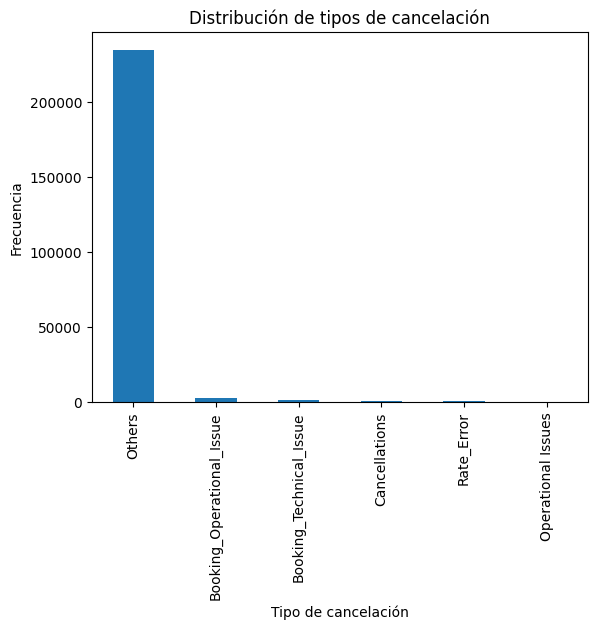

In [108]:
import matplotlib.pyplot as plt

reason_counts = df['Reason'].value_counts()
reason_counts.plot(kind='bar', title='Distribución de tipos de cancelación')
plt.xlabel('Tipo de cancelación')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Distribución gasto

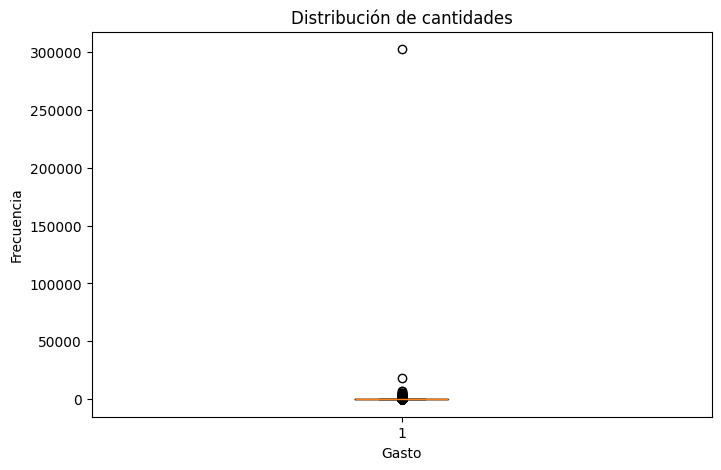

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))  
plt.boxplot(df['Amount'])  

plt.xlabel('Gasto')  
plt.ylabel('Frecuencia')  
plt.title('Distribución de cantidades') 
plt.show()

In [ ]:
#Euros por tipo de cancelación

In [ ]:
#cancelaciones por región

/var/folders/cr/f3dqyy756z9ftxxsrmgtgjjh0000gn/T/ipykernel_14136/2017763889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x='CustomerRegion', y='Count', palette='viridis')


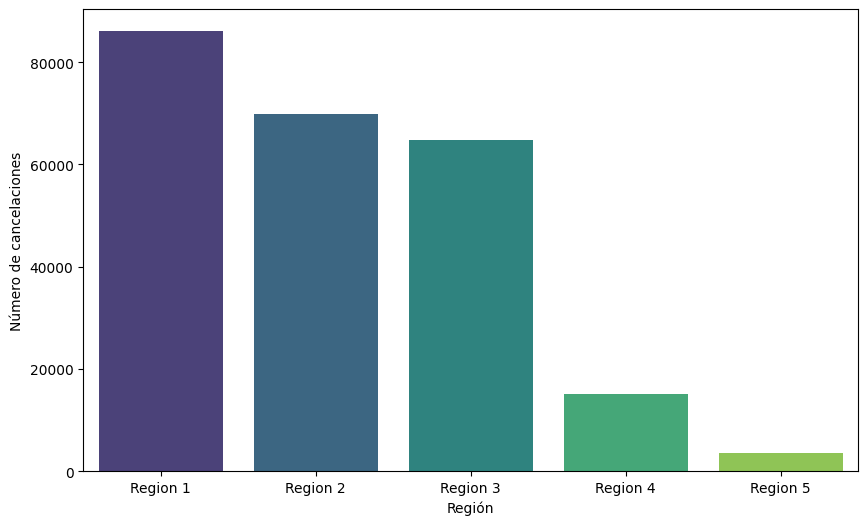

In [110]:
plt.figure(figsize=(10, 6))
region_counts = df['CustomerRegion'].value_counts().reset_index()
region_counts.columns = ['CustomerRegion', 'Count']
sns.barplot(data=region_counts, x='CustomerRegion', y='Count', palette='viridis')
plt.xlabel('Región')
plt.ylabel('Número de cancelaciones')
plt.show()

In [ ]:
#Solicitudes en el tiempo

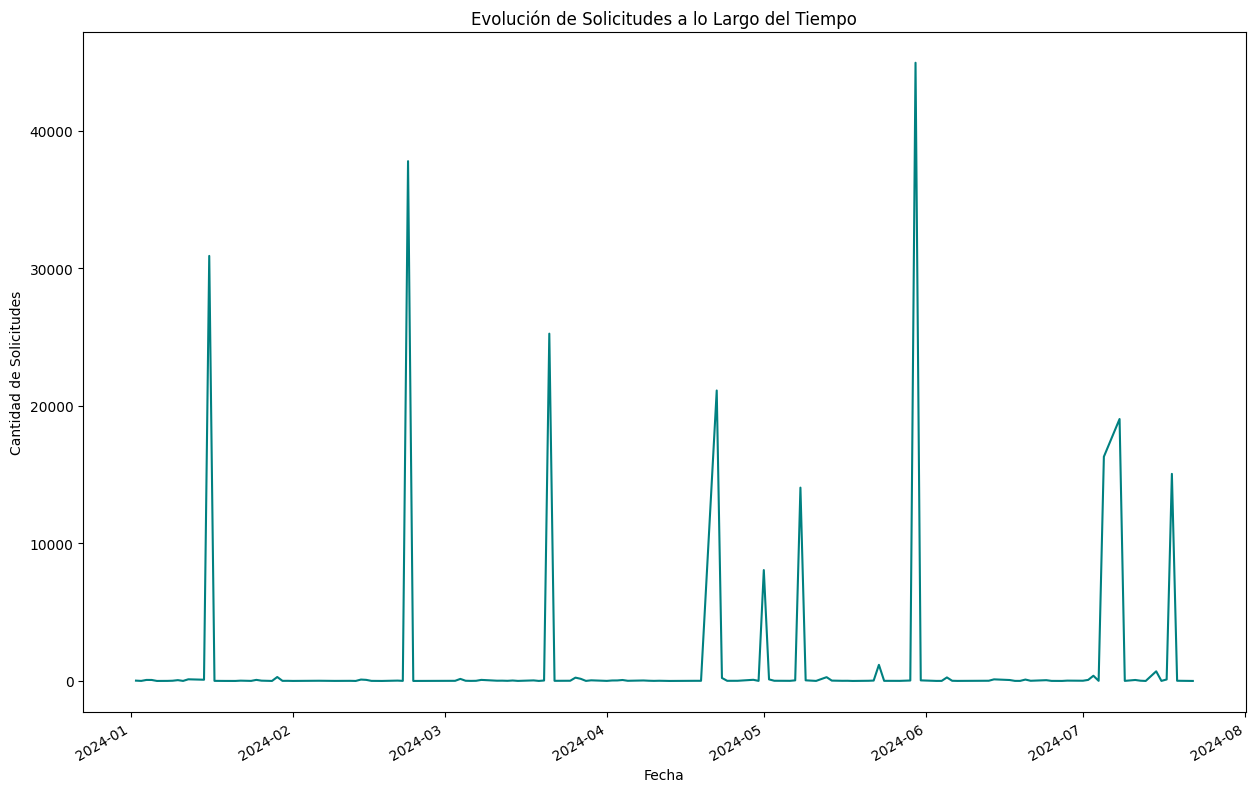

In [111]:

df.groupby('Request_date').size().plot(figsize=(15,10), linestyle='-', color='teal')

plt.title("Evolución de Solicitudes a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Solicitudes")
plt.show()

In [ ]:
#correos con más peticiones

/var/folders/cr/f3dqyy756z9ftxxsrmgtgjjh0000gn/T/ipykernel_14136/128422515.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_correos, x='Requested_by', y='Count', palette='pastel')


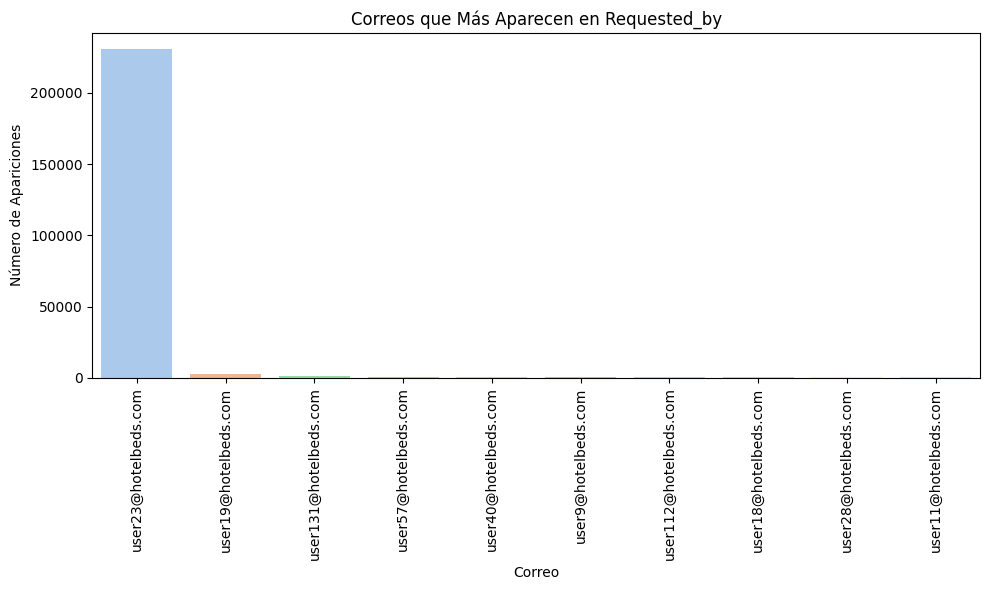

In [112]:

correos_frecuencia = df['Requested_by'].value_counts().reset_index()
correos_frecuencia.columns = ['Requested_by', 'Count']


top_correos = correos_frecuencia.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(data=top_correos, x='Requested_by', y='Count', palette='pastel')
plt.title('Correos que Más Aparecen en Requested_by')
plt.xlabel('Correo')
plt.ylabel('Número de Apariciones')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()